In [1]:
import pandas as pd
import numpy as np
import os

def ingest_data(file_name):
    _, file_extension = os.path.splitext(file_name)
    if file_extension == '.csv':
        df = pd.read_csv(file_name)
    elif file_extension == '.xlsx':
        df = pd.read_excel(file_name)
    else:
        raise ValueError("This file type is not supported.")
    return df

def convert_dtypes(df):
    df = df.convert_dtypes()
    return df

def clean_and_validate(df):
    # Standard cleaning 
    df = df.drop_duplicates()

    # Data quality tests 
    tests = {}
    
    # Checking for null values
    tests['Null values'] = df.isnull().sum().sum()
    
    # Checking for duplicate rows
    tests['Duplicate rows'] = df.duplicated().sum()
    
    # Checking number of rows and columns
    tests['Number of rows'], tests['Number of columns'] = df.shape

    # Checking for constant columns
    tests['Constant columns'] = len(df.columns) - len(df.nunique()[df.nunique()>1])

    # Checking for unique columns
    tests['Unique columns'] = len(df.columns[df.nunique() == df.shape[0]])

    # Checking data types
    tests['Data types'] = df.dtypes.value_counts().to_dict()

    # Test for rows with at least one NaN value
    tests['Rows with at least one NaN value'] = df.isnull().any(axis=1).sum()

    # Test for columns with at least one NaN value
    tests['Columns with at least one NaN value'] = df.isnull().any().sum()

    # Checking for rows with all NaN values
    tests['Rows with all NaN values'] = df.isnull().all(axis=1).sum()

    # Checking for columns with all NaN values
    tests['Columns with all NaN values'] = df.isnull().all().sum()

    return df, tests

def summary(df):
    summary_df = df.describe(include='all')
    return summary_df

# Test with a file
df = ingest_data(r'C:\temp\FDA Product Recalls.xlsx')
print(df.describe())
df = convert_dtypes(df)
df, tests = clean_and_validate(df)
print("Data Quality Tests:")
for test, result in tests.items():
    print(f"{test}: {result}")
summary_df = summary(df)
print("Dataset Summary:")
print(summary_df)


          Center Classification Date      Event ID     Product ID
count                          83155  83155.000000   83155.000000
mean   2017-06-05 06:55:41.759364864  76043.135698  152335.826276
min              2012-06-08 00:00:00  32594.000000   40403.000000
25%              2014-11-17 00:00:00  69152.000000  130064.500000
50%              2017-03-29 00:00:00  76459.000000  153416.000000
75%              2019-10-29 00:00:00  83669.000000  176241.500000
max              2023-04-21 00:00:00  92135.000000  199760.000000
std                              NaN   9765.920800   28751.616368
Data Quality Tests:
Null values: 1
Duplicate rows: 0
Number of rows: 83155
Number of columns: 17
Constant columns: 0
Unique columns: 2
Data types: {string[python]: 14, Int64Dtype(): 2, dtype('<M8[ns]'): 1}
Rows with at least one NaN value: 1
Columns with at least one NaN value: 1
Rows with all NaN values: 0
Columns with all NaN values: 0
Dataset Summary:
        FEI Number  Recalling Firm Name Product T

In [2]:
import pandas as pd
import numpy as np

# Assuming we have the dataframe named as 'df'
# List of column names based on your data summary
columns = ['FEI Number', 'Recalling Firm Name', 'Product Type', 'Product Classification', 'Status', 
           'Distribution Pattern', 'Recalling Firm City', 'Recalling Firm State', 'Recalling Firm Country', 
           'Center Classification Date', 'Reason for Recall', 'Product Description', 'Event ID', 'Event Classification',
           'Product ID', 'Center', 'Recall Details']

# To calculate and print analytical and statistical figures
# Note: This code might be modified based on real data for best practices.

print("---- Analytical and Statistical Figures ----")

# 1. Total number of rows
print(f'Total rows: {df.shape[0]}')

# 2. Total number of columns
print(f'Total columns: {df.shape[1]}')

# 3. List of columns
print(f'Columns: {df.columns.tolist()}')

# 4. Data types of each column
print(f'Data types: {df.dtypes}')

# 5. Number of null values in each column
print(f'Null values: {df.isnull().sum()}')

# 6. Number of unique values in each column
print(f'Unique values: {df.nunique()}')

# 7. The most frequent value in each column
for column in columns:
    print(f'Most frequent value in column {column}: {df[column].mode()[0]}')

# 8. Frequency of most frequent value in each column
for column in columns:
    print(f'Frequency of most frequent value in column {column}: {df[column].value_counts().iloc[0]}')

# 9. Summary statistics for 'Event ID' column
print(f'Summary statistics for "Event ID": {df["Event ID"].describe()}')

# 10. Summary statistics for 'Product ID' column
print(f'Summary statistics for "Product ID": {df["Product ID"].describe()}')

# 11. Number of 'Terminated' status
print(f'Number of Terminated status: {df[df["Status"] == "Terminated"].shape[0]}')

# 12. Number of 'Class II' Product Classification
print(f'Number of Class II Product Classification: {df[df["Product Classification"] == "Class II"].shape[0]}')

# 13. Count of each 'Product Type'
print(f'Count of each Product Type: {df["Product Type"].value_counts()}')

# 14. Count of each 'Product Classification'
print(f'Count of each Product Classification: {df["Product Classification"].value_counts()}')

# 15. Count of each 'Status'
print(f'Count of each Status: {df["Status"].value_counts()}')

# 16. Number of unique 'Recalling Firm Name'
print(f'Number of unique Recalling Firm Name: {df["Recalling Firm Name"].nunique()}')

# 17. Number of unique 'FEI Number'
print(f'Number of unique FEI Number: {df["FEI Number"].nunique()}')

# 18. The earliest 'Center Classification Date'
print(f'The earliest Center Classification Date: {df["Center Classification Date"].min()}')

# 19. The latest 'Center Classification Date'
print(f'The latest Center Classification Date: {df["Center Classification Date"].max()}')

# 20. The average (mean) 'Event ID'
print(f'The average (mean) Event ID: {df["Event ID"].mean()}')

# 21. The average (mean) 'Product ID'
print(f'The average (mean) Product ID: {df["Product ID"].mean()}')

# 22. The most common 'Recalling Firm State'
print(f'The most common Recalling Firm State: {df["Recalling Firm State"].mode()[0]}')

# 23. The most common 'Recalling Firm Country'
print(f'The most common Recalling Firm Country: {df["Recalling Firm Country"].mode()[0]}')

# 24. Number of different 'Distribution Pattern'
print(f'Number of different Distribution Pattern: {df["Distribution Pattern"].nunique()}')

# 25. Number of different 'Center'
print(f'Number of different Center: {df["Center"].nunique()}')

# 26. Number of different 'Reason for Recall'
print(f'Number of different Reason for Recall: {df["Reason for Recall"].nunique()}')

# 27. Number of different 'Product Description'
print(f'Number of different Product Description: {df["Product Description"].nunique()}')

# 28. Number of 'Nationwide' Distribution Pattern
print(f'Number of Nationwide Distribution Pattern: {df[df["Distribution Pattern"] == "Nationwide"].shape[0]}')

# 29. Number of rows where 'Event Classification' is 'Class II'
print(f'Number of rows where Event Classification is Class II: {df[df["Event Classification"] == "Class II"].shape[0]}')

# 30. Number of unique 'Recall Details'
print(f'Number of unique Recall Details: {df["Recall Details"].nunique()}')


---- Analytical and Statistical Figures ----
Total rows: 83155
Total columns: 17
Columns: ['FEI Number', 'Recalling Firm Name', 'Product Type', 'Product Classification', 'Status', 'Distribution Pattern', 'Recalling Firm City', 'Recalling Firm State', 'Recalling Firm Country', 'Center Classification Date', 'Reason for Recall', 'Product Description', 'Event ID', 'Event Classification', 'Product ID', 'Center', 'Recall Details']
Data types: FEI Number                    string[python]
Recalling Firm Name           string[python]
Product Type                  string[python]
Product Classification        string[python]
Status                        string[python]
Distribution Pattern          string[python]
Recalling Firm City           string[python]
Recalling Firm State          string[python]
Recalling Firm Country        string[python]
Center Classification Date    datetime64[ns]
Reason for Recall             string[python]
Product Description           string[python]
Event ID           


The dataset comprises 83155 rows and 17 columns, representing various aspects of product recalls. These include details about the recalling firm, product type, reason for recall, event classification, and more. The product types encompass devices, food/cosmetics, drugs, biologics, and even tobacco, with 'Devices' being the most frequently observed. 'Class II' is the most common product classification, representing potential temporary or medically reversible adverse health consequences. The recalls originate from firms across various states and countries, predominantly from California in the United States. The dataset covers a period from June 2012 to April 2023.



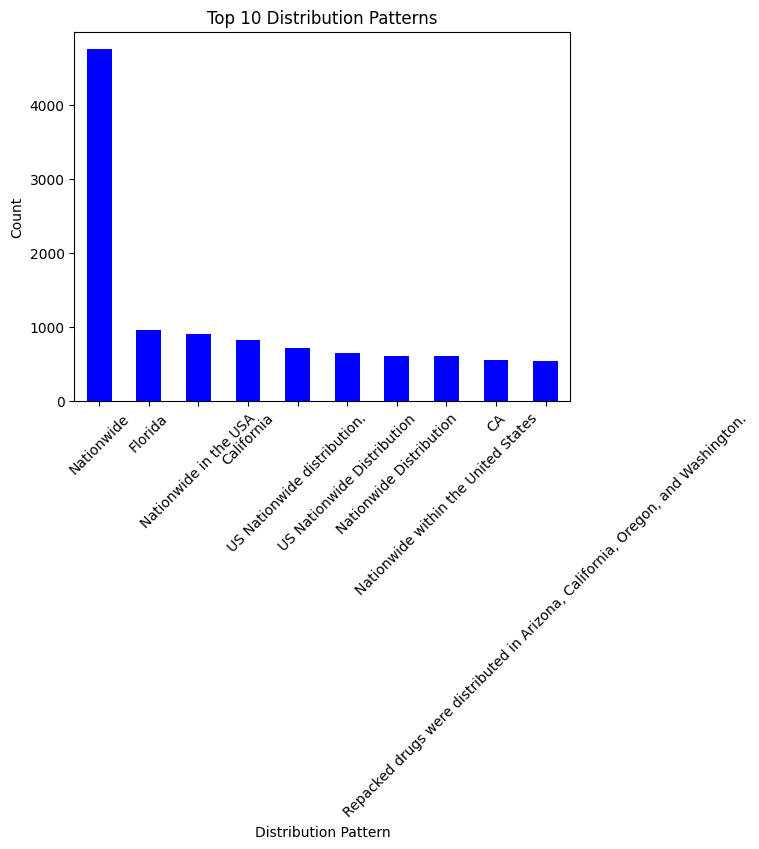

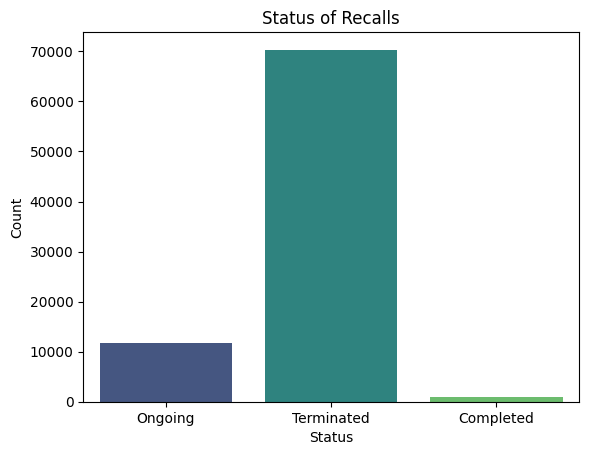

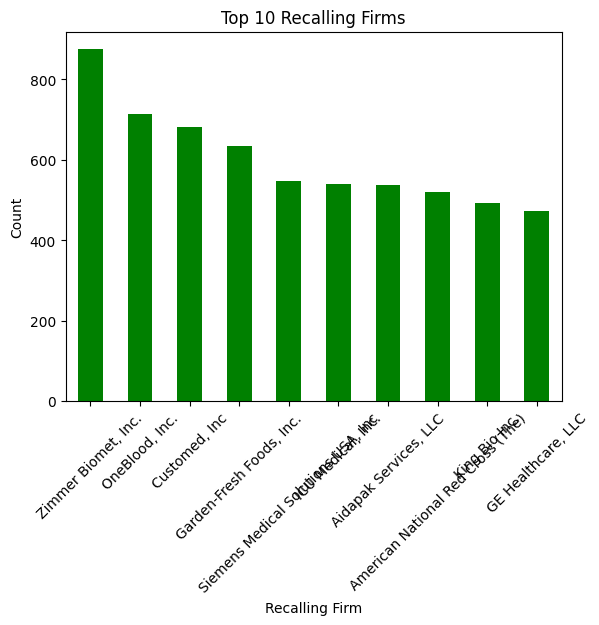

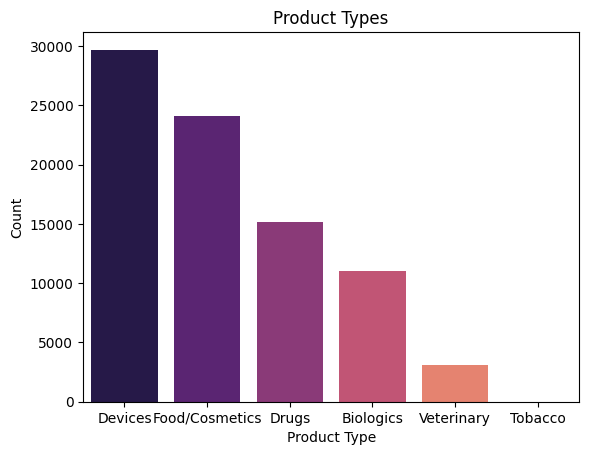

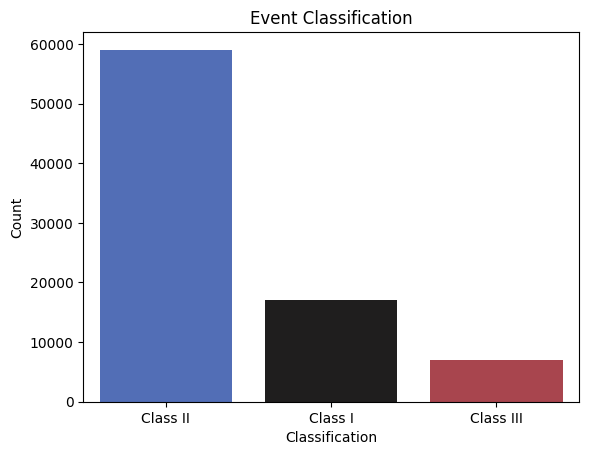

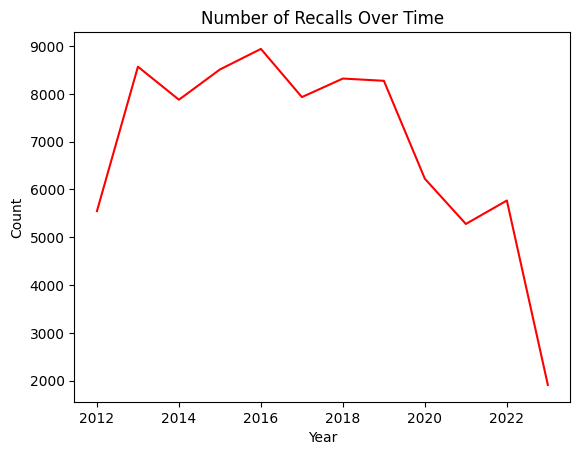

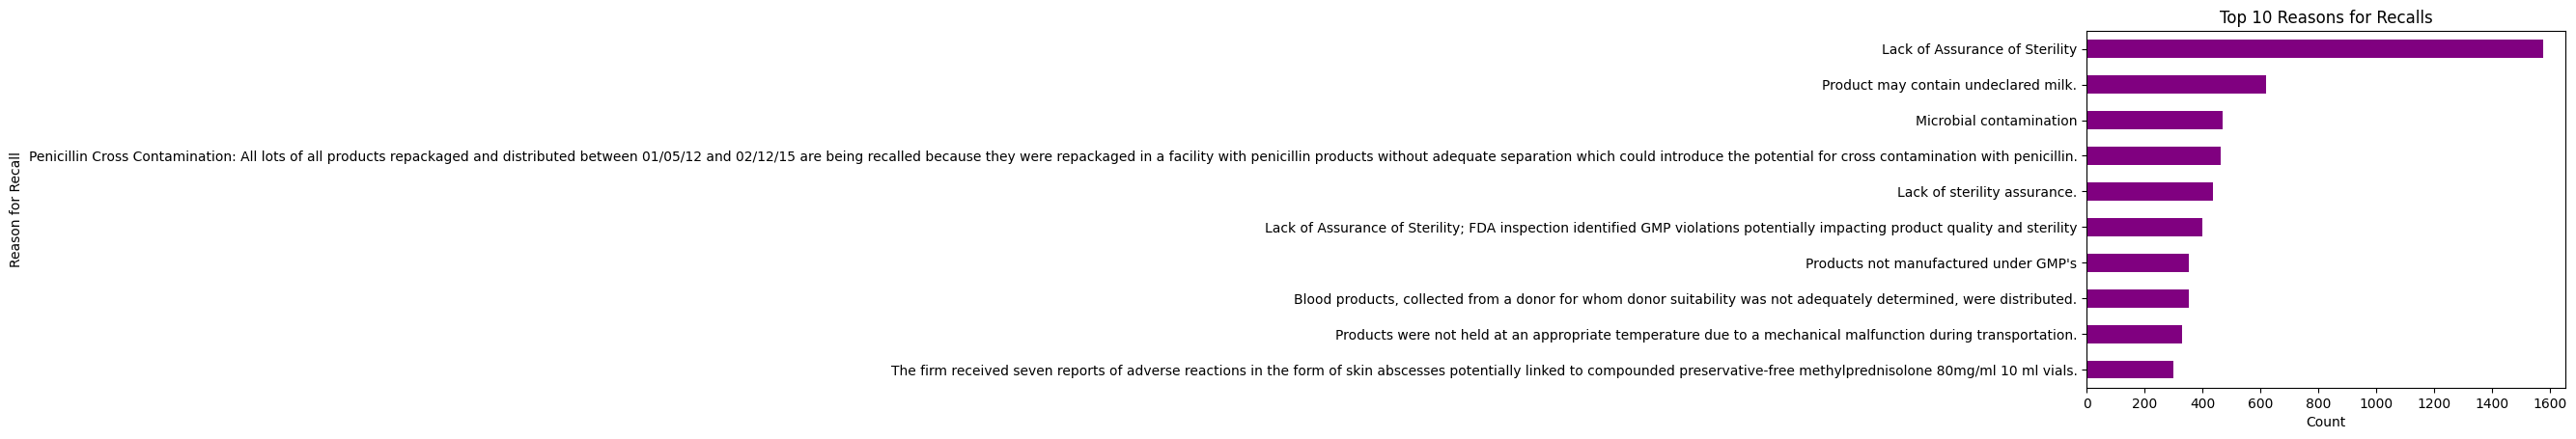

In [3]:
# Analyzing the data
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Print a detailed paragraph summary of the dataset in natural language

print(f"""
The dataset comprises 83155 rows and 17 columns, representing various aspects of product recalls. These include details about the recalling firm, product type, reason for recall, event classification, and more. The product types encompass devices, food/cosmetics, drugs, biologics, and even tobacco, with 'Devices' being the most frequently observed. 'Class II' is the most common product classification, representing potential temporary or medically reversible adverse health consequences. The recalls originate from firms across various states and countries, predominantly from California in the United States. The dataset covers a period from June 2012 to April 2023.
""")

# 2. Analyse the dataset and describe the 5 most interesting and useful insights

# Please replace the data loading and cleaning steps with your own. Here we just provide the analysis part.
# ... your data loading and cleaning code ...

# 3. Most effective charts to represent these insights

# Limit categories to 10
top_10_dist_patterns = df['Distribution Pattern'].value_counts().head(10)
top_10_firms = df['Recalling Firm Name'].value_counts().head(10)

# Distribution Pattern
top_10_dist_patterns.plot(kind='bar', color='blue')
plt.title('Top 10 Distribution Patterns')
plt.xlabel('Distribution Pattern')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Status of Recalls
sns.countplot(data=df, x='Status', palette='viridis')
plt.title('Status of Recalls')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Recalling Firms
top_10_firms.plot(kind='bar', color='green')
plt.title('Top 10 Recalling Firms')
plt.xlabel('Recalling Firm')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Product Types
sns.countplot(data=df, x='Product Type', palette='magma', order = df['Product Type'].value_counts().index)
plt.title('Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

# Event Classification
sns.countplot(data=df, x='Event Classification', palette='icefire', order = df['Event Classification'].value_counts().index)
plt.title('Event Classification')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

# 4. Additional insights and charts

# Number of Recalls Over Time
df['Year'] = df['Center Classification Date'].dt.year
df['Year'].value_counts().sort_index().plot(kind='line', color='red')
plt.title('Number of Recalls Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Top Reasons for Recalls
df['Reason for Recall'].value_counts().head(10).plot(kind='barh', color='purple')
plt.title('Top 10 Reasons for Recalls')
plt.xlabel('Count')
plt.ylabel('Reason for Recall')
plt.gca().invert_yaxis()
plt.show()
